In [1]:
##Ilsoo Kim; 012516803
##Group 10
##Grape Disease Detection  



In [2]:
#traning the image

from __future__ import absolute_import, division, print_function

from sklearn import tree
import tensorflow as tf
import pathlib
import random
import numpy as np
import os

import IPython.display as display
import pathlib
from PIL import Image
import os
import random

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt


PATH = '/Users/j/Desktop/MSSE/CMPE257/Updated Data/'
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

train_blackmeasles_dir = os.path.join(train_dir, 'blackmeasles') # directory with our training black_measles
train_blackrot_dir = os.path.join(train_dir, 'black_rot')  # directory with our training blackrot pictures
train_healthy_dir = os.path.join(train_dir, 'healthy')  # directory with our training healthy pictures
train_leafbli_dir = os.path.join(train_dir, 'leaf_blight')  # directory with our training leafbli pictures
train_mealybug_dir = os.path.join(train_dir, 'mealybug')  # directory with our training mealybug pictures
train_phylloxe_dir = os.path.join(train_dir, 'phylloxera')  # directory with our training phylloxe pictures

validation_blackmeasles_dir = os.path.join(validation_dir, 'blackmeasles') # directory with our validation black_measles
validation_blackrot_dir = os.path.join(validation_dir, 'black_rot')  # directory with our validation blackrot pictures
validation_healthy_dir = os.path.join(validation_dir, 'healthy')  # directory with our validation healthy pictures
validation_leafbli_dir = os.path.join(validation_dir, 'leaf_blight')  # directory with our validation leafbli pictures
validation_mealybug_dir = os.path.join(validation_dir, 'mealybug')  # directory with our validation mealybug pictures
validation_phylloxe_dir = os.path.join(validation_dir, 'phylloxera')  # directory with our validation phylloxe pictures


num_train_blackmeasles = len(os.listdir(train_blackmeasles_dir))
num_train_blackrot = len(os.listdir(train_blackrot_dir))
num_train_healthy = len(os.listdir(train_healthy_dir))
num_train_leafbli = len(os.listdir(train_leafbli_dir))
num_train_mealybug = len(os.listdir(train_mealybug_dir))
num_train_phylloxe = len(os.listdir(train_phylloxe_dir))

num_val_blackmeasles = len(os.listdir(validation_blackmeasles_dir))
num_val_blackrot = len(os.listdir(validation_blackrot_dir))
num_val_healthy = len(os.listdir(validation_healthy_dir))
num_val_leafbli = len(os.listdir(validation_leafbli_dir))
num_val_mealybug = len(os.listdir(validation_mealybug_dir))
num_val_phylloxe = len(os.listdir(validation_phylloxe_dir))


test_blackmeasles_dir = os.path.join(test_dir, 'blackmeasles') # directory with our test black_measles pictures
test_blackrot_dir = os.path.join(test_dir, 'black_rot')  # directory with our test blackrot pictures
test_healthy_dir = os.path.join(test_dir, 'healthy')  # directory with our test healthy pictures
test_leafbli_dir = os.path.join(test_dir, 'leaf_blight')  # directory with our test leafbli pictures
test_mealybug_dir = os.path.join(test_dir, 'mealybug')  # directory with our test mealybug pictures
test_phylloxe_dir = os.path.join(test_dir, 'phylloxera')  # directory with our test phylloxe pictures

num_test_blackmeasles = len(os.listdir(test_blackmeasles_dir))
num_test_blackrot = len(os.listdir(test_blackrot_dir))
num_test_healthy = len(os.listdir(test_healthy_dir))
num_test_leafbli = len(os.listdir(test_leafbli_dir))
num_test_mealybug = len(os.listdir(test_mealybug_dir))
num_test_phylloxe = len(os.listdir(test_phylloxe_dir))


total_train = num_train_blackmeasles + num_train_blackrot + num_train_healthy + num_train_leafbli + num_train_mealybug + num_train_phylloxe
total_val = num_val_blackmeasles + num_val_blackrot + num_val_healthy + num_val_leafbli + num_val_mealybug + num_val_phylloxe

print('total training blackmeasles images:', num_train_blackmeasles)
print('total training blackrot images:', num_train_blackrot)
print('total training healthy images:', num_train_healthy)
print('total training leafblight images:', num_train_leafbli)
print('total training mealybug images:', num_train_mealybug)
print('total training phylloxera images:', num_train_phylloxe)
print("--")
print('total validation blackmeasles images:', num_val_blackmeasles)
print('total validation blackrot images:', num_val_blackrot)
print('total validation healthy images:', num_val_healthy)
print('total validation leafblight images:', num_val_leafbli)
print('total validation mealybug images:', num_val_mealybug)
print('total validation phylloxera images:', num_val_phylloxe)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)
print("--")
print('total test blackmeasles images:', num_test_blackmeasles)
print('total test blackrot images:', num_test_blackrot)
print('total test healthy images:', num_test_healthy)
print('total test leafblight images:', num_test_leafbli)
print('total test mealybug images:', num_test_mealybug)
print('total test phylloxera images:', num_test_phylloxe)
print("--")
total_test=num_test_blackmeasles+num_test_blackrot+num_test_healthy+num_test_leafbli+num_test_mealybug+num_test_phylloxe
print("Total test images:", total_test )

print("--")
print("--")
print('total All blackmeasles images:', num_train_blackmeasles+ num_val_blackmeasles+ num_test_blackmeasles)
print('total All blackrot images:', num_train_blackrot+ num_val_blackrot + num_test_blackrot)
print('total All healthy images:', num_train_healthy+ num_val_healthy+ num_test_healthy)
print('total All leafblight images:', num_train_leafbli+ num_val_leafbli+ num_test_leafbli)
print('total All mealybug images:', num_train_mealybug + num_val_mealybug + num_test_mealybug)
print('total All phylloxera images:', num_train_phylloxe+ num_val_phylloxe+ num_test_phylloxe)
print("Total All images:", total_train + total_val+ total_test)



total training blackmeasles images: 2422
total training blackrot images: 2266
total training healthy images: 1625
total training leafblight images: 2067
total training mealybug images: 343
total training phylloxera images: 100
--
total validation blackmeasles images: 605
total validation blackrot images: 566
total validation healthy images: 406
total validation leafblight images: 526
total validation mealybug images: 83
total validation phylloxera images: 24
--
Total training images: 8823
Total validation images: 2210
--
total test blackmeasles images: 756
total test blackrot images: 708
total test healthy images: 507
total test leafblight images: 645
total test mealybug images: 106
total test phylloxera images: 38
--
Total test images: 2760
--
--
total All blackmeasles images: 3783
total All blackrot images: 3540
total All healthy images: 2538
total All leafblight images: 3238
total All mealybug images: 532
total All phylloxera images: 162
Total All images: 13793


In [3]:
batch_size = 64
epochs = 30
IMG_HEIGHT = 100
IMG_WIDTH = 100

train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')



Found 8822 images belonging to 6 classes.
Found 2208 images belonging to 6 classes.


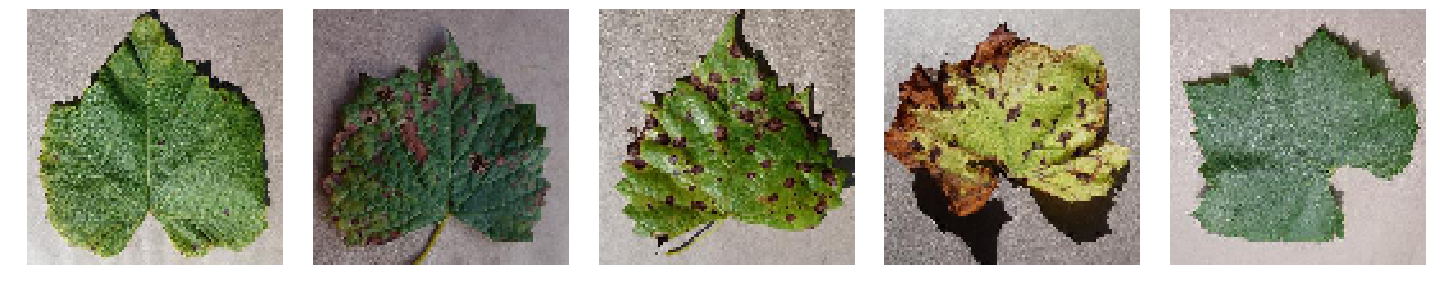

In [4]:
sample_training_images, _ = next(train_data_gen)
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(sample_training_images[:5])


In [5]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(6, activation='softmax'),
])



In [6]:
###multiple categorize needs categorical_crossentropy.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 




In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       7

In [8]:
# print(total_train);
# print(batch_size);
# print(total_val);

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)





Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 137 steps, validate for 34 steps
Epoch 1/30
137/137 [==============================] - 96s 701ms/step - loss: 0.7381 - accuracy: 0.6883 - val_loss: 0.4687 - val_accuracy: 0.8231
Epoch 2/30
137/137 [==============================] - 82s 600ms/step - loss: 0.3208 - accuracy: 0.8736 - val_loss: 0.2439 - val_accuracy: 0.9026
Epoch 3/30
137/137 [==============================] - 82s 601ms/step - loss: 0.2034 - accuracy: 0.9211 - val_loss: 0.2122 - val_accuracy: 0.9237
Epoch 4/30
137/137 [==============================] - 83s 603ms/step - loss: 0.1468 - accuracy: 0.9460 - val_loss: 0.1574 - val_accuracy: 0.9370
Epoch 5/30
137/137 [==============================] - 82s 598ms/step - loss: 0.1012 - accuracy: 0.9629 - val_loss: 0.0885 - val_accuracy: 0.9619
Epoch 6/30
137/137 [==============================] - 81s 595ms/step - loss: 0.0803 - accuracy: 0.9726 - v

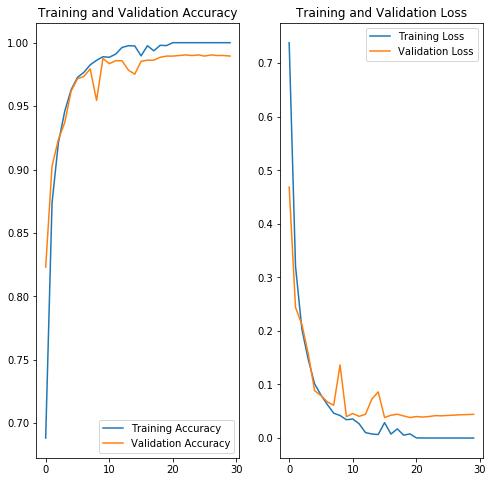

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()




In [10]:
!mkdir -p saved_model
model.save('saved_model/my_model') 
np.save('saved_model/my_model/my_history.npy',history.history)
#np.save('saved_model/my_model/my_history.npy',history)

model.save('grape.h5')


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [11]:
from __future__ import absolute_import, division, print_function

from sklearn import tree
import tensorflow as tf
import pathlib
import random
import numpy as np
import os

import IPython.display as display
import pathlib
from PIL import Image
import os
import random

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
model = keras.models.load_model('saved_model/my_model')
history=np.load('saved_model/my_model/my_history.npy',allow_pickle='TRUE').item()

In [12]:
model.summary();

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       7

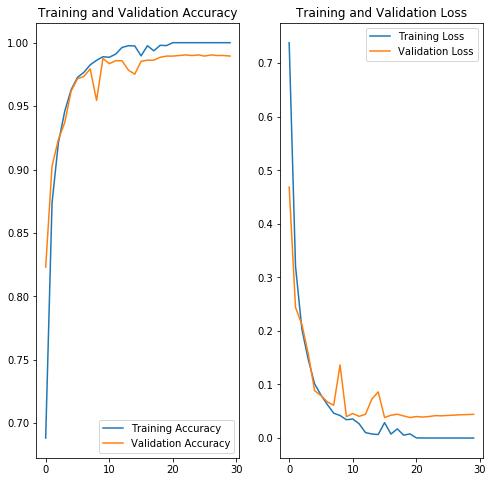

In [13]:
acc = history['accuracy']
val_acc = history['val_accuracy']

loss=history['loss']
val_loss=history['val_loss']
epochs=30
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [14]:
##Final Results: Accuracy and loss of Testdataset 

test_image_generator = ImageDataGenerator(rescale=1./255)
test_data_gen = test_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical')

# Evaluate the model
loss,acc = model.evaluate(test_data_gen, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))


Found 2759 images belonging to 6 classes.
  ...
    to  
  ['...']
44/44 - 21s - loss: 0.0420 - accuracy: 0.9924
Restored model, accuracy: 99.24%


In [16]:
import numpy as np
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

#Confution Matrix and Classification Report Train_dataset
Y_pred = model.predict_generator(train_data_gen, total_train // batch_size+1)
#Y_pred = model.predict_generator(train_data_gen, 35)
#Y_pred = model.predict_generator(train_data_gen, 74)
y_pred = np.argmax(Y_pred, axis=1)
y_pred.sort()
#add
y_pred.shape

print('Confusion Matrix')
print(confusion_matrix(train_data_gen.classes, y_pred))
print('Classification Report')
target_names = ['blackmeasles', 'black_rot', 'healthy', 'leaf_blight','mealybug','phylloxera' ]

print(classification_report(train_data_gen.classes, y_pred, target_names=target_names))


Using TensorFlow backend.


Confusion Matrix
[[2266    0    0    0    0    0]
 [   0 2422    0    0    0    0]
 [   0    0 1625    0    0    0]
 [   0    0    0 2067    0    0]
 [   0    0    0    0  343    0]
 [   0    0    0    0    0   99]]
Classification Report
              precision    recall  f1-score   support

blackmeasles       1.00      1.00      1.00      2266
   black_rot       1.00      1.00      1.00      2422
     healthy       1.00      1.00      1.00      1625
 leaf_blight       1.00      1.00      1.00      2067
    mealybug       1.00      1.00      1.00       343
  phylloxera       1.00      1.00      1.00        99

    accuracy                           1.00      8822
   macro avg       1.00      1.00      1.00      8822
weighted avg       1.00      1.00      1.00      8822



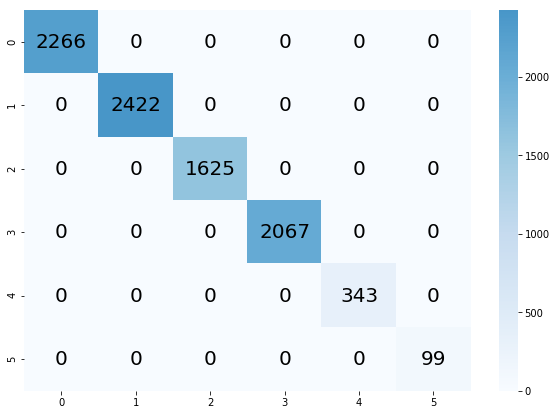

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

cf_matrix = confusion_matrix(train_data_gen.classes, y_pred)
plt.figure(figsize=(10,7))

ax=sns.heatmap(cf_matrix, annot=True, fmt="d", center=2000, cmap='Blues', annot_kws={"size": 20, "color":'black'})

In [18]:
#Confution Matrix and Classification Report of Validation_dataset
print(total_val)
##total_test += len(os.listdir(os.path.join(os.path.join(PATH,'testing'), category)));
    
Y_pred = model.predict_generator(val_data_gen, total_val // batch_size+1)
#Y_pred = model.predict_generator(train_data_gen, 35)
#Y_pred = model.predict_generator(train_data_gen, 74)
y_pred = np.argmax(Y_pred, axis=1)
y_pred.sort()
#add
y_pred.shape

print('Confusion Matrix')
print(confusion_matrix(val_data_gen.classes, y_pred))
print('Classification Report')
target_names = ['blackmeasles', 'black_rot', 'healthy', 'leaf_blight','mealybug','phylloxera' ]

print(classification_report(val_data_gen.classes, y_pred, target_names=target_names))


2210
Confusion Matrix
[[566   0   0   0   0   0]
 [  0 605   0   0   0   0]
 [  0   2 404   0   0   0]
 [  0   0   2 524   0   0]
 [  0   0   0   3  79   0]
 [  0   0   0   0   4  19]]
Classification Report
              precision    recall  f1-score   support

blackmeasles       1.00      1.00      1.00       566
   black_rot       1.00      1.00      1.00       605
     healthy       1.00      1.00      1.00       406
 leaf_blight       0.99      1.00      1.00       526
    mealybug       0.95      0.96      0.96        82
  phylloxera       1.00      0.83      0.90        23

    accuracy                           1.00      2208
   macro avg       0.99      0.96      0.98      2208
weighted avg       1.00      1.00      0.99      2208



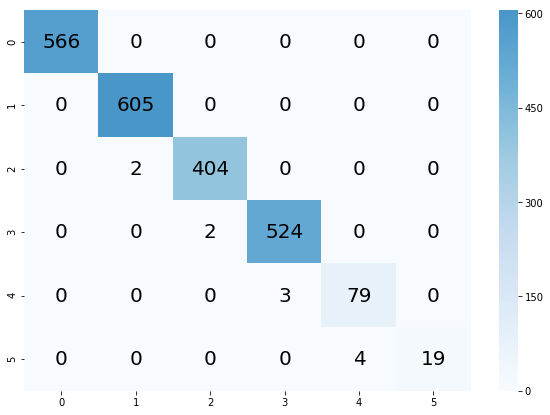

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

cf_matrix = confusion_matrix(val_data_gen.classes, y_pred)
plt.figure(figsize=(10,7))

ax=sns.heatmap(cf_matrix, annot=True, fmt="d", center=500, cmap='Blues', annot_kws={"size": 20, "color":'black'})

In [20]:
#Confution Matrix and Classification Report of Test_dataset
print(total_test)
##total_test += len(os.listdir(os.path.join(os.path.join(PATH,'testing'), category)));
    
Y_pred = model.predict_generator(test_data_gen, total_test // batch_size+1)
#Y_pred = model.predict_generator(train_data_gen, 35)
#Y_pred = model.predict_generator(train_data_gen, 74)
y_pred = np.argmax(Y_pred, axis=1)
y_pred.sort()
#add
y_pred.shape

print('Confusion Matrix')
print(confusion_matrix(test_data_gen.classes, y_pred))
print('Classification Report')
target_names = ['blackmeasles', 'black_rot', 'healthy', 'leaf_blight','mealybug','phylloxera' ]

print(classification_report(test_data_gen.classes, y_pred, target_names=target_names))


2760
Confusion Matrix
[[708   0   0   0   0   0]
 [  1 755   0   0   0   0]
 [  0   0 507   0   0   0]
 [  0   0   0 645   0   0]
 [  0   0   0   1 105   0]
 [  0   0   0   0   2  35]]
Classification Report
              precision    recall  f1-score   support

blackmeasles       1.00      1.00      1.00       708
   black_rot       1.00      1.00      1.00       756
     healthy       1.00      1.00      1.00       507
 leaf_blight       1.00      1.00      1.00       645
    mealybug       0.98      0.99      0.99       106
  phylloxera       1.00      0.95      0.97        37

    accuracy                           1.00      2759
   macro avg       1.00      0.99      0.99      2759
weighted avg       1.00      1.00      1.00      2759



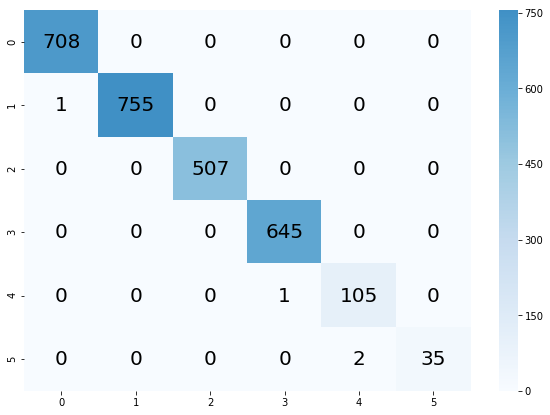

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

cf_matrix = confusion_matrix(test_data_gen.classes, y_pred)
plt.figure(figsize=(10,7))

ax=sns.heatmap(cf_matrix, annot=True, fmt="d", center=600, cmap='Blues', annot_kws={"size": 20, "color":'black'})